In [231]:
# adjustments depending on direction
# if head is at the following position (relative to tail being at (0,0))
adjustments_by_position = {
    (0,0): dict(L=((-1,0), (0,0)), R=((1,0), (0,0)), U=((0,-1), (0,0)), D=((0,1), (0,0))),
    (1,0): dict(L=((0,0), (0,0)), R=((2,0), (1,0)), U=((1,-1), (0,0)), D=((1,1), (0,0))),
    (-1,0): dict(L=((-2,0), (-1,0)), R=((0,0), (0,0)), U=((-1,-1), (0,0)), D=((-1,1), (0,0))),
    (0,1): dict(L=((-1,1), (0,0)), R=((1,1), (0,0)), U=((0,0), (0,0)), D=((0,2), (0,1))),
    (0,-1): dict(L=((-1,-1), (0,0)), R=((1,-1), (0,0)), U=((0,-2), (0,-1)), D=((0,0), (0,0))),
    (1,1): dict(L=((0,1), (0,0)), R=((2,1), (1,1)), U=((1,0), (0,0)), D=((1,2), (1,1))),
    (-1,1): dict(L=((-2,1), (-1,1)), R=((0,1), (0,0)), U=((-1,0), (0,0)), D=((-1,2), (-1,1))),
    (1,-1): dict(L=((0,-1), (0,0)), R=((2,-1), (1,-1)), U=((1,-2), (1,-1)), D=((1,0), (0,0))),
    (-1,-1): dict(L=((-2,-1), (-1,-1)), R=((0,-1), (0,0)), U=((-1,-2), (-1,-1)), D=((-1,0), (0,0))),
}

# start positions
head_position = [0, 0]
tail_positions = [(0, 0)] # will collect all tail positions

with open('data/day9.txt', 'r') as f:
    line = f.readline()
    while line:
        direction, steps = line.strip().split(' ')
        for s in range(int(steps)):
            adjustments = adjustments_by_position[(head_position[0] - tail_positions[-1][0], head_position[1] - tail_positions[-1][1])][direction]
            head_position = [adjustments[0][0] + tail_positions[-1][0], adjustments[0][1] + tail_positions[-1][1]]
            tail_positions.append(tuple([tail_positions[-1][0] + adjustments[1][0], tail_positions[-1][1] + adjustments[1][1]]))
        line = f.readline()

print(len(set(tail_positions)))

6030


# Part 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Result: 2545
Final Position


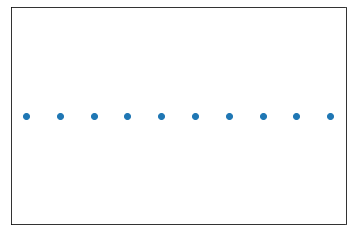

Locations visited by tail


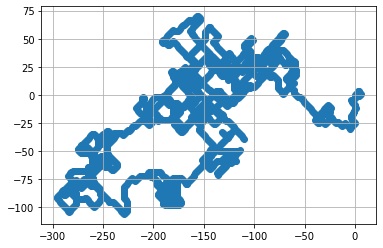

In [240]:
L = (-1, 0)
R = (1, 0)
U = (0, 1)
D = (0, -1)
RU = (1, 1)
RD = (1, -1)
LU = (-1, 1)
LD = (-1, -1)

moves = dict(
    L=L, R=R, U=U, D=D, RU=RU, RD=RD, LU=LU, LD=LD
)

directions = {v: k for k, v in moves.items()}

adjustments = {
    R: dict(R=R, RU=RU, RD=RD),
    L: dict(L=L, LU=LU, LD=LD),

    U: dict(U=U, LU=LU, RU=RU),
    D: dict(D=D, LD=LD, RD=RD),

    RU: dict(R=RU, U=RU, RU=RU, RD=R, LU=U),
    LU: dict(L=LU, U=LU, LU=LU, LD=L, RU=U),

    LD: dict(D=LD, L=LD, LD=LD, RD=D, LU=L),        
    RD: dict(D=RD, R=RD, RD=RD, LD=D, RU=R),
}

rope = [[0, 0]] * 10
tail_positions = [(0, 0)]

with open('data/day9.txt', 'r') as f:
    line = f.readline() 
    while line:
        direction, steps = line.strip().split(' ')
        for _ in range(int(steps)):
            new_direction = direction
            move_x, move_y = moves[direction][0], moves[direction][1]
            k = 0
            while new_direction and k < len(rope) - 1:
                situation = (rope[k][0] - rope[k+1][0], rope[k][1] - rope[k+1][1]) 
                rope[k] = (rope[k][0] + move_x, rope[k][1] + move_y)
                move_x, move_y = adjustments.get(situation, {}).get(new_direction, (0, 0))
                new_direction = directions.get((move_x, move_y))
                k += 1
            rope[k] = (rope[k][0] + move_x, rope[k][1] + move_y)                
            tail_positions.append(tuple(rope[-1]))   
        line = f.readline()         

print("Result:", len(set(tail_positions)))

print("Final Position")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(-30, 30, 1))
ax.set_yticks(np.arange(-30, 30, 1))

plt.scatter([x[0] for x in rope],[x[1] for x in rope] )
plt.grid()
plt.show()

print("Locations visited by tail")
st = set(tail_positions)
plt.scatter([x[0] for x in st],[x[1] for x in st] )
plt.grid()
plt.show()